In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Distribution 1:
mu = -2
sigma = 1

# Distribution 2
nu = 2
tau = 2

## Plotting the distributions

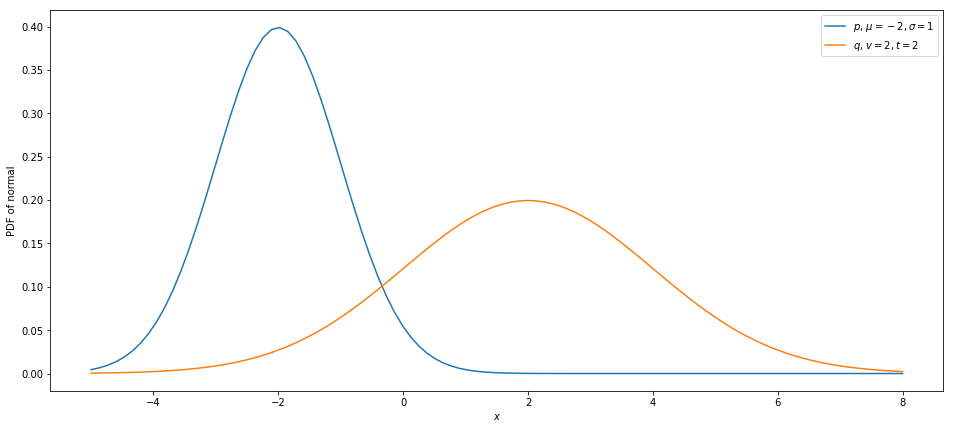

In [16]:
n = 100
x = np.linspace(-5, 8, n)

p = norm.pdf(x, loc = mu, scale = sigma)
q = norm.pdf(x, loc = nu, scale = tau)


plt.figure(figsize=(16, 7))
plt.plot(x, p, label="$p$, $\mu={0}, \sigma={1}$".format(mu, sigma))
plt.plot(x, q, label="$q$, $v={0}, t={1}$".format(nu, tau)) # nu and tau are not recognized as latex symbols
plt.ylabel("PDF of normal")
plt.xlabel("$x$")
plt.legend();

## Sampling from $p(x)$

## Monte Carlo Approximation of KL divergence

First do the monte carlo approximation, and then check the result analytically:

$$KL(p || q) = \ln{\dfrac{\tau}{\sigma}} - \dfrac{1}{2} + \frac{\sigma^2}{2 \tau^2} + \frac{(\mu - \nu)^2}{2 \tau^2},$$

for $p$ and $q$ as unimodal gaussians

In [17]:
def MC_KL_divergence(p, q):
    assert len(p) == len(q)
    n = len(p)
    
    return (1/n) * np.sum(np.log(p/q))

def analytic_KL(m1, s1, m2, s2):
    """only for unimodal gaussians"""
    return np.log(s2 / s1) - (1/2) + (s1**2 / (2 *s2**2)) + ((m1 - m2)**2 / (2*s2**2))

In [18]:
# draw n samples from p(x)
x = np.random.normal(size=100000, loc = mu, scale = sigma)
p = norm.pdf(x, loc = mu, scale = sigma)
q = norm.pdf(x, loc = nu, scale = tau)


analytic_pq = np.log(tau / sigma) - (1/2) + (sigma**2 / (2 *tau**2)) + ((mu - nu)**2 / (2*tau**2))
mc_pq = MC_KL_divergence(p, q)

print("Analytic KL(p || q) \t= {0}\nMonte Carlo KL(p || q) \t= {1}".format(analytic_pq, mc_pq))

Analytic KL(p || q) 	= 2.3181471805599454
Monte Carlo KL(p || q) 	= 2.3187335131974205


In [19]:
# draw n samples from q(x)
x = np.random.normal(size=100000, loc = nu, scale = tau)
p = norm.pdf(x, loc = mu, scale = sigma)
q = norm.pdf(x, loc = nu, scale = tau)


analytic_qp = np.log(sigma / tau) - (1/2) + (tau**2 / (2 *sigma**2)) + ((nu - mu)**2 / (2*sigma**2))
mc_qp = MC_KL_divergence(q, p)

print("Analytic KL(p || q) \t= {0}\nMonte Carlo KL(p || q) \t= {1}".format(analytic_qp, mc_qp))

Analytic KL(p || q) 	= 8.806852819440055
Monte Carlo KL(p || q) 	= 8.801909792267615


In [75]:
# sanity check
MC_KL_divergence(p, p) == MC_KL_divergence(q, q) == 0

True